<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Descent for Linear Regression (for single feature)**\
Automate the process of optimizing w & b usin gradient descent

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datas/house_price_data.txt')
data = np.array(data)
data_tr = data[:30]
data_tr.shape
print(data_tr[:5])

[[  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]
 [  1985      4 299900]]


In [ ]:
x_train = data_tr[:, 0] # all rows and column 0.
print(x_train)
y_train = data_tr[:, 2] # all rows and column 2.
print(y_train)

[1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478 1268
 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526 2200
 2637 1839]
[329900 369000 232000 539900 299900 314900 198999 212000 242500 239999
 347000 329999 699900 259900 449900 299900 199900 499998 599000 252900
 255000 242900 259900 573900 249900 464500 469000 475000 299900 349900]


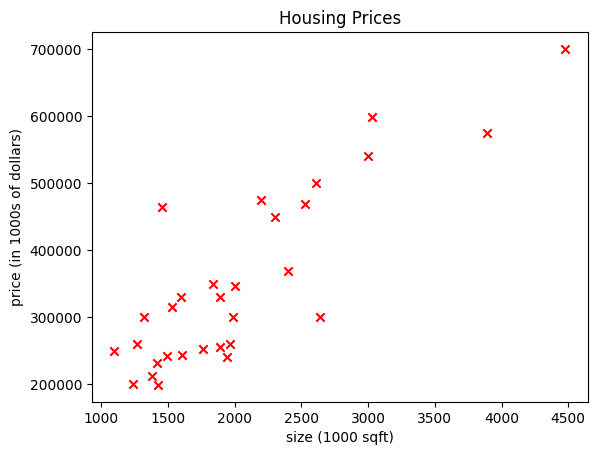

In [ ]:
# Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
plt.title('Housing Prices')
plt.xlabel('size (1000 sqft)')
plt.ylabel('price (in 1000s of dollars)')
plt.show()

Compute cost using cost function\
x -> data, m examples\
y -> target valus\
w, b -> model parameters

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0

  for i in range(m):
    f_wb = w * x[i] + b
    cost = cost + (f_wb - y[i])**2
  total_cost = 1 / (2 * m) * cost
  return total_cost

Compute gradient\
d/dw (J) -> gradient of the cost w.r.t parameter w\
d/dv (J) -> gradient of the cost w.r.t parameter v

In [ ]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = (f_wb - y[i])
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [26]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  """
  Performs gradient descent to fit w, b. Updates w, b by taking num_iters gradient gradient steps with learning rate alpha.

  Args:
    x (ndarray (m, )): Data, m example
    y (ndarray (m, )): target values
    w_in, b_in (scalar): initial values of model parameters
    alpha(float):     Learning rate
    num_iters(int):    number of iterations to run gradient descent
    cost_function:    function to call to produce cost
    gradient_function: function to call to product gradient

  Returns:
    w (scalar): updated value of parameter after running gradient descent
    b (scalar): updated value of parameter after running gradient descent
    j_history (list): history of cost values
    p_history (list): history of parameters [w,b]
  """
  w = copy.deepcopy(w_in) #avoid modifying gloabl w_in

  # array to store cost J and w's at each iteration primarily for graphing later
  j_history = []
  p_history = []
  w = w_in
  b = b_in

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function (x, y, w, b)   # calculate the gradient and update the parameters using gradient_function

    b = b - alpha * dj_db  # update parameters
    w = w - alpha * dj_dw  # update parameters

    # save cost j at each iteration
    if i < 100000:    # prevent resource exhaustion
      j_history.append(cost_function(x, y, w, b))
      p_history.append([w,b])

    # print cost every at intervals 10 times or as many iteration if < 10
    if i % math.ceil(num_iters/10) == 0:
      print(f'Iteration {i:4}: Cost {j_history[-1]:0.2e}, ', f'dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}', f'w: {w:0.3e}, b: {b:0.5e}')

  return w, b, j_history, p_history

In [27]:
# initialized parameters
w_init = 0
b_init = 0

#some gradient descent settings
iteration = 5000
tmp_alpha = 1.0e-10

w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iteration, compute_cost, compute_gradient)

print(f'(w,b) found by gradient descent: ({w_final: 8.4f}, {b_final: 8.4f})')

Iteration    0: Cost 7.04e+10,  dj_dw: -8.033e+08, dj_db: -3.519e+05 w: 8.033e-02, b: 3.51913e-05
Iteration  500: Cost 4.48e+10,  dj_dw: -6.335e+08, dj_db: -2.790e+05 w: 3.582e+01, b: 1.57319e-02
Iteration 1000: Cost 2.88e+10,  dj_dw: -4.996e+08, dj_db: -2.215e+05 w: 6.401e+01, b: 2.81836e-02
Iteration 1500: Cost 1.89e+10,  dj_dw: -3.940e+08, dj_db: -1.761e+05 w: 8.624e+01, b: 3.80765e-02
Iteration 2000: Cost 1.27e+10,  dj_dw: -3.107e+08, dj_db: -1.404e+05 w: 1.038e+02, b: 4.59514e-02
Iteration 2500: Cost 8.86e+09,  dj_dw: -2.450e+08, dj_db: -1.122e+05 w: 1.176e+02, b: 5.22350e-02
Iteration 3000: Cost 6.47e+09,  dj_dw: -1.932e+08, dj_db: -8.992e+04 w: 1.285e+02, b: 5.72637e-02
Iteration 3500: Cost 4.99e+09,  dj_dw: -1.523e+08, dj_db: -7.238e+04 w: 1.371e+02, b: 6.13028e-02
Iteration 4000: Cost 4.06e+09,  dj_dw: -1.201e+08, dj_db: -5.855e+04 w: 1.439e+02, b: 6.45615e-02
Iteration 4500: Cost 3.49e+09,  dj_dw: -9.474e+07, dj_db: -4.764e+04 w: 1.492e+02, b: 6.72049e-02
(w,b) found by gradi

In [55]:
for s_list in p_hist[:5]:
  print(s_list)
w_min = np.min(p_hist[0])
b_min = np.min(p_hist[1])
print(f'Minimum w: {w_min:.20f}')
print(f'Minimum b: {b_min:.20f}')

[0.08033354841666666, 3.519131666666667e-05]
[0.16062894522677604, 7.03662509092856e-05]
[0.240886208549098, 0.00010552481050811555]
[0.32110535649379757, 0.00014066700323972034]
[0.40128640716243896, 0.00017579283687697053]
Minimum w: 0.00003519131666666667
Minimum b: 0.00007036625090928560


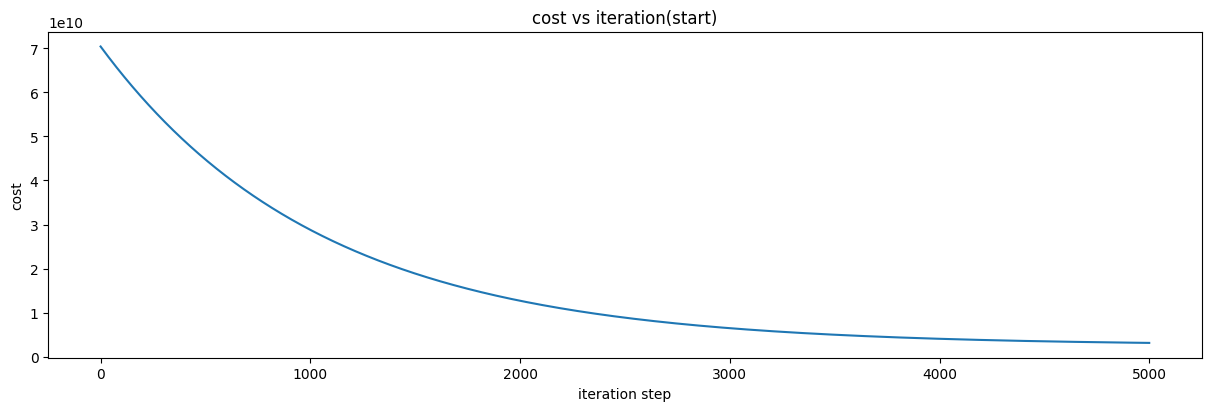

In [56]:
# plot cost versus iteration
fig, (ax1) = plt.subplots(1, 1, constrained_layout= True, figsize = (12, 4))
ax1.plot(j_hist[:iteration])
ax1.set_title("cost vs iteration(start)")
ax1.set_xlabel("iteration step")
ax1.set_ylabel("cost")
plt.show()

In [57]:
# predict housing values based on our learned parameters.
print(f'1000 sqft house predictioni {w_final * 1.0 + b_final:0.1f} thousand dollars')
print(f'1200 sqft house predictioni {w_final * 1.2 + b_final:0.1f} thousand dollars')
print(f'1500 sqft house predictioni {w_final * 1.5 + b_final:0.1f} thousand dollars')

1000 sqft house predictioni 153.5 thousand dollars
1200 sqft house predictioni 184.2 thousand dollars
1500 sqft house predictioni 230.2 thousand dollars


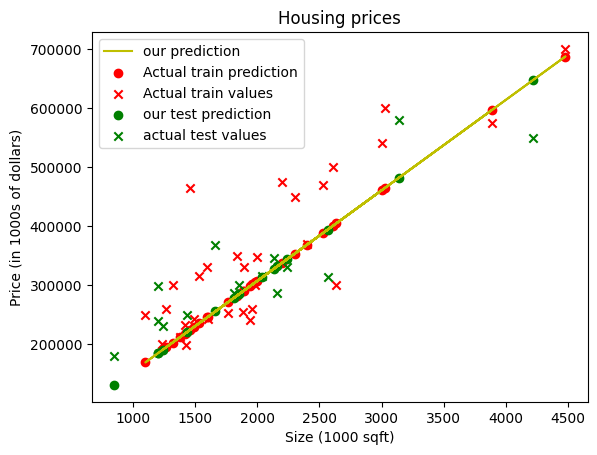

In [80]:
# plot the final predited graph
tmp_f_wb = np.dot(x_train, w_final) + b_final
plt.plot(x_train, tmp_f_wb, c='y', label = 'our prediction')  # plot the model prediction
plt.scatter(x_train, tmp_f_wb, c='r', label='Actual train prediction')   # plot the data points on predicted line
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual train values')   # plot the data points

data_ts = data[31:] #(46,3)
x_test = data_ts[:, 0]
y_test = data_ts[:, 2]
data_ts.shape
tmp_f_wb = np.dot(x_test, w_final) + b_final
#plt.plot(x_test, y_test, c='g', label='our test')  # plot the test values
plt.scatter(x_test, tmp_f_wb, c='g', label='our test prediction')   # plot the test data points on predictedline
plt.scatter(x_test, y_test, marker='x', c='g', label='actual test values') # plot the actual test data point

plt.title('Housing prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()
plt.show()